In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm

from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pylab as pl
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-white')

Using TensorFlow backend.


## Load Data

In [2]:
data = pd.read_csv('data/20142018_whole.csv', usecols=list(range(1,14)))
data = data.dropna()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41108 entries, 0 to 42538
Data columns (total 13 columns):
time                     41108 non-null object
windspeed                41108 non-null float64
winddirection            41108 non-null float64
GUSTwindspeed            41108 non-null float64
pressure                 41108 non-null float64
humidity                 41108 non-null float64
temperature              41108 non-null float64
watertemperature         41108 non-null float64
maximumwaveheight        41108 non-null float64
significantwaveheight    41108 non-null float64
averagewaveheight        41108 non-null float64
waveperiod               41108 non-null float64
wavedirection            41108 non-null float64
dtypes: float64(12), object(1)
memory usage: 4.4+ MB


In [4]:
trainX = data[['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection']]
trainX_ = trainX.values

In [5]:
trainY = data[['windspeed']]
trainY_ = trainY.values

In [6]:
trainX.info()
size=trainX.shape
size

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41108 entries, 0 to 42538
Data columns (total 4 columns):
significantwaveheight    41108 non-null float64
wavedirection            41108 non-null float64
waveperiod               41108 non-null float64
winddirection            41108 non-null float64
dtypes: float64(4)
memory usage: 1.6 MB


(41108, 4)

In [7]:
n = size[0]

## Plot Data

In [8]:
trainX.head()

,significantwaveheight,wavedirection,waveperiod,winddirection
0,1.7,180.0,5.8,312.0
1,2.2,172.0,6.4,307.0
2,2.2,187.0,5.8,321.0
3,2.0,168.0,6.4,331.0
4,2.1,202.0,7.1,321.0


In [9]:
trainX.tail()

,significantwaveheight,wavedirection,waveperiod,winddirection
42534,0.8,323.0,3.6,10.0
42535,0.8,316.0,4.6,3.0
42536,0.9,329.0,4.6,2.0
42537,0.9,330.0,4.6,9.0
42538,0.9,313.0,5.3,348.0


In [10]:
trainX_

array([[  1.7, 180. ,   5.8, 312. ],
       [  2.2, 172. ,   6.4, 307. ],
       [  2.2, 187. ,   5.8, 321. ],
       ...,
       [  0.9, 329. ,   4.6,   2. ],
       [  0.9, 330. ,   4.6,   9. ],
       [  0.9, 313. ,   5.3, 348. ]])

In [11]:
n1=int(n/5)

In [12]:
x = trainX_[0:n1,0]
y = trainY_[0:n1,0]

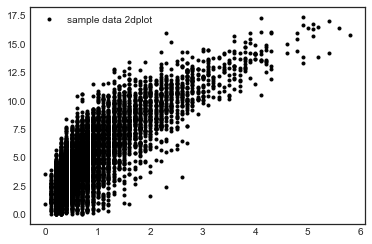

In [13]:
pl.figure()
plt.plot(x, y, 'k.', label='sample data 2dplot')
plt.legend()
plt.show()

In [14]:
data.iloc[0:10][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]

,significantwaveheight,wavedirection,waveperiod,winddirection,windspeed
0,1.7,180.0,5.8,312.0,9.3
1,2.2,172.0,6.4,307.0,8.4
2,2.2,187.0,5.8,321.0,7.7
3,2.0,168.0,6.4,331.0,6.0
4,2.1,202.0,7.1,321.0,5.9
5,2.0,131.0,7.1,298.0,4.3
6,2.3,87.0,7.1,300.0,2.4
7,1.9,114.0,7.1,252.0,4.6
8,1.8,156.0,7.1,260.0,6.8
9,1.8,134.0,6.4,137.0,7.5


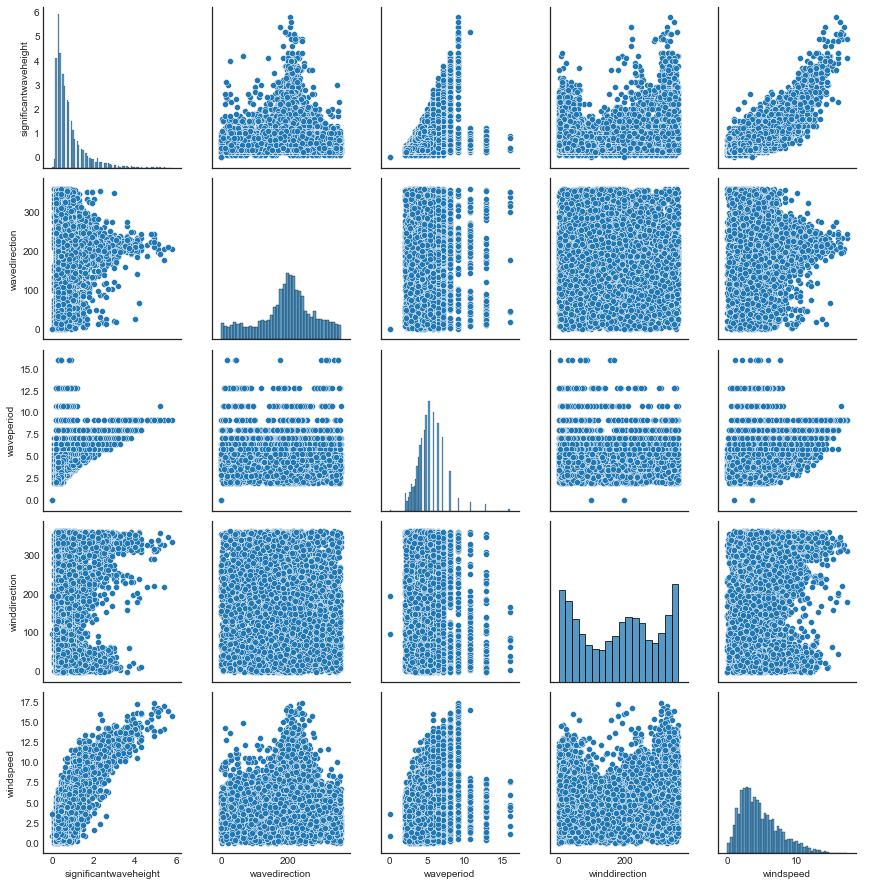

In [15]:
sns.pairplot(data.iloc[0:n1][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]);

## Season 

In [16]:
year = int(n/5)
startI = 0
endI = int(year/4) + startI

In [17]:
indices = []
for i in range(5):
    indices.append(range(i*year+startI,i*year+endI))

In [18]:
spring = np.reshape(indices, (-1))

In [19]:
spring

array([    0,     1,     2, ..., 34936, 34937, 34938])

In [20]:
spring.size

10275

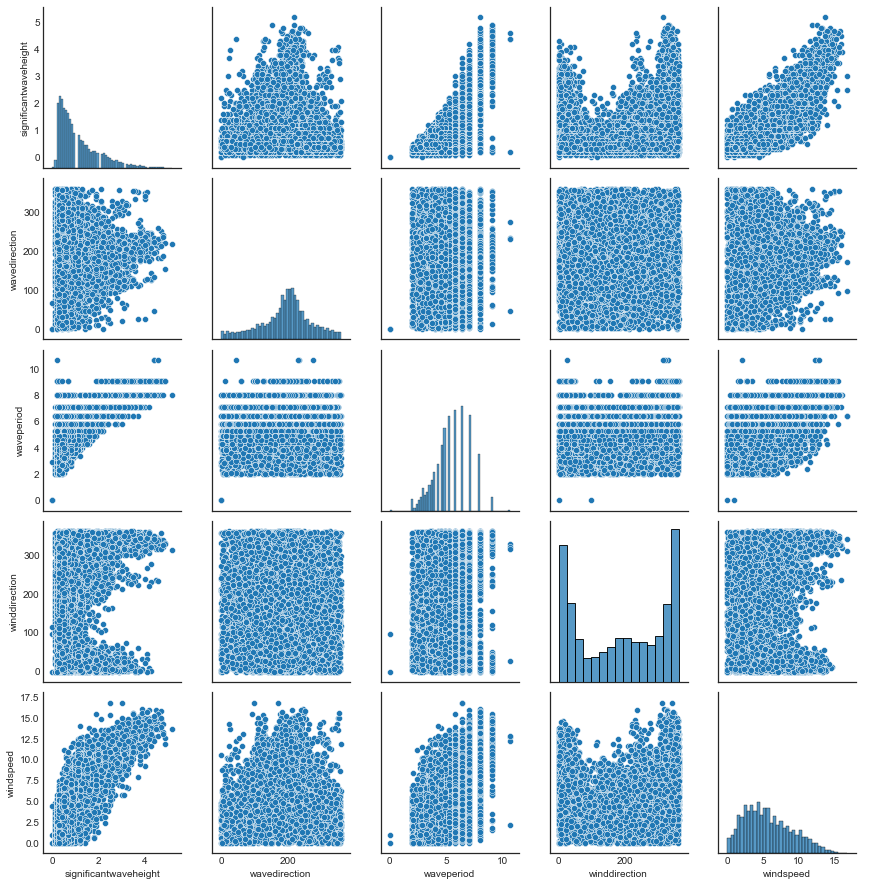

In [21]:
sns.pairplot(data.iloc[spring][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]);

## Periodic Shift - winddirection

In [22]:
#import math

In [23]:
#data.iloc[0:n2]['winddirection'] = np.sin(data.iloc[0:n2]['winddirection']/360.*math.pi)

In [38]:
n2 = 1000

In [39]:
wd = data.iloc[0:n2]['winddirection'].values

In [40]:
wd

array([312., 307., 321., 331., 321., 298., 300., 252., 260., 137., 290.,
       273., 295., 267., 265., 264., 254., 243., 240., 200., 276., 282.,
       289., 318., 352., 281., 300.,  85., 137., 129., 116., 118., 129.,
       132., 120., 113., 123., 117., 153., 303., 150., 173., 195., 239.,
       217., 221., 255., 265.,  31.,  24.,  29.,  21.,  20.,  17.,  24.,
        19.,  31.,  12., 320.,  16.,   9.,  12.,   6.,   8.,   9.,  19.,
        20.,  31.,  22.,  29.,  27.,  17.,   5., 156., 174., 158., 250.,
       264., 170., 249., 294., 165., 253., 163., 167., 166., 166., 132.,
       130., 249.,  92.,  63.,  40.,   5.,  14.,  25.,   8., 343., 353.,
       358., 241.,  61., 334., 350.,   3., 342., 328., 352.,  15.,  13.,
        31.,  20.,  21., 252.,  30., 262.,  13.,  21., 335., 253.,  33.,
       314.,   8., 317., 304., 310., 338., 243., 319., 235., 348., 328.,
       321., 319., 278., 288., 156., 280., 292., 286., 334., 330.,  18.,
       351.,   6.,   4.,  10., 357., 336.,  42.,  3

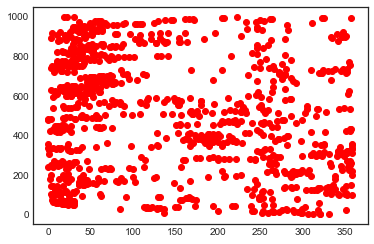

In [41]:
plt.plot(wd, range(n2), 'ro')
plt.show()

(array([231., 192.,  66.,  57.,  67.,  59.,  73.,  97.,  67.,  91.]),
 array([  0. ,  35.9,  71.8, 107.7, 143.6, 179.5, 215.4, 251.3, 287.2,
        323.1, 359. ]),
 <a list of 10 Patch objects>)

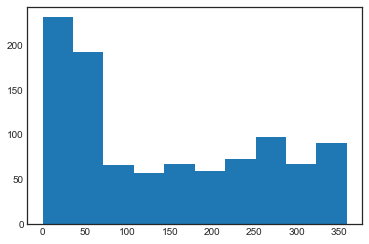

In [42]:
counts, bins = np.histogram(wd)
plt.hist(bins[:-1], bins, weights=counts)

In [43]:
wd = wd-180

In [44]:
wd

array([ 132.,  127.,  141.,  151.,  141.,  118.,  120.,   72.,   80.,
        -43.,  110.,   93.,  115.,   87.,   85.,   84.,   74.,   63.,
         60.,   20.,   96.,  102.,  109.,  138.,  172.,  101.,  120.,
        -95.,  -43.,  -51.,  -64.,  -62.,  -51.,  -48.,  -60.,  -67.,
        -57.,  -63.,  -27.,  123.,  -30.,   -7.,   15.,   59.,   37.,
         41.,   75.,   85., -149., -156., -151., -159., -160., -163.,
       -156., -161., -149., -168.,  140., -164., -171., -168., -174.,
       -172., -171., -161., -160., -149., -158., -151., -153., -163.,
       -175.,  -24.,   -6.,  -22.,   70.,   84.,  -10.,   69.,  114.,
        -15.,   73.,  -17.,  -13.,  -14.,  -14.,  -48.,  -50.,   69.,
        -88., -117., -140., -175., -166., -155., -172.,  163.,  173.,
        178.,   61., -119.,  154.,  170., -177.,  162.,  148.,  172.,
       -165., -167., -149., -160., -159.,   72., -150.,   82., -167.,
       -159.,  155.,   73., -147.,  134., -172.,  137.,  124.,  130.,
        158.,   63.,

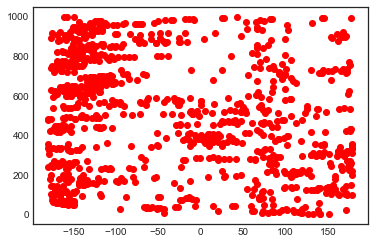

In [45]:
plt.plot(wd, range(n2), 'ro')
plt.show()

In [46]:
rwd = list(map(lambda x: x+360 if x < 0 else x, wd))

In [47]:
rwd = np.array(rwd)

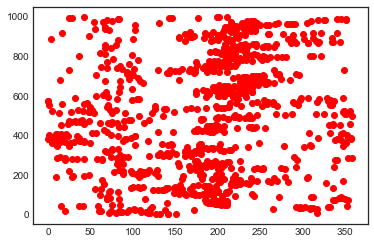

In [48]:
plt.plot(rwd, range(n2), 'ro')
plt.show()

(array([ 59.,  73.,  97.,  67.,  91., 231., 192.,  66.,  57.,  67.]),
 array([  0. ,  35.9,  71.8, 107.7, 143.6, 179.5, 215.4, 251.3, 287.2,
        323.1, 359. ]),
 <a list of 10 Patch objects>)

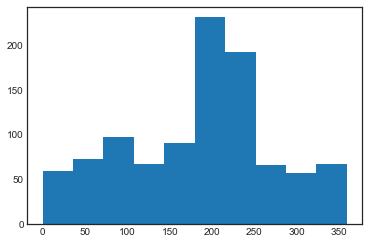

In [50]:
counts, bins = np.histogram(rwd)
plt.hist(bins[:-1], bins, weights=counts)

## Periodic Shift Wind Direction Data

In [ ]:
# too slow 
# for i in range(n2):
#    if data.iloc[i]['winddirection'] > 360:
#        data.iloc[i]['winddirection'] = data.iloc[i]['winddirection'] - 360

In [51]:
wd = data.iloc[:]['winddirection']

In [52]:
wd.shape

(41108,)

In [53]:
wd = wd-180

In [54]:
rwd = list(map(lambda x: x+360 if x < 0 else x, wd))

In [55]:
data.iloc[:]['winddirection'] = rwd

(0.0, 2040.0)

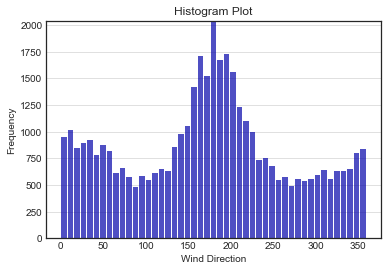

In [56]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=data.iloc[:]['winddirection'], bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Histogram Plot')
#plt.text(0, 180, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

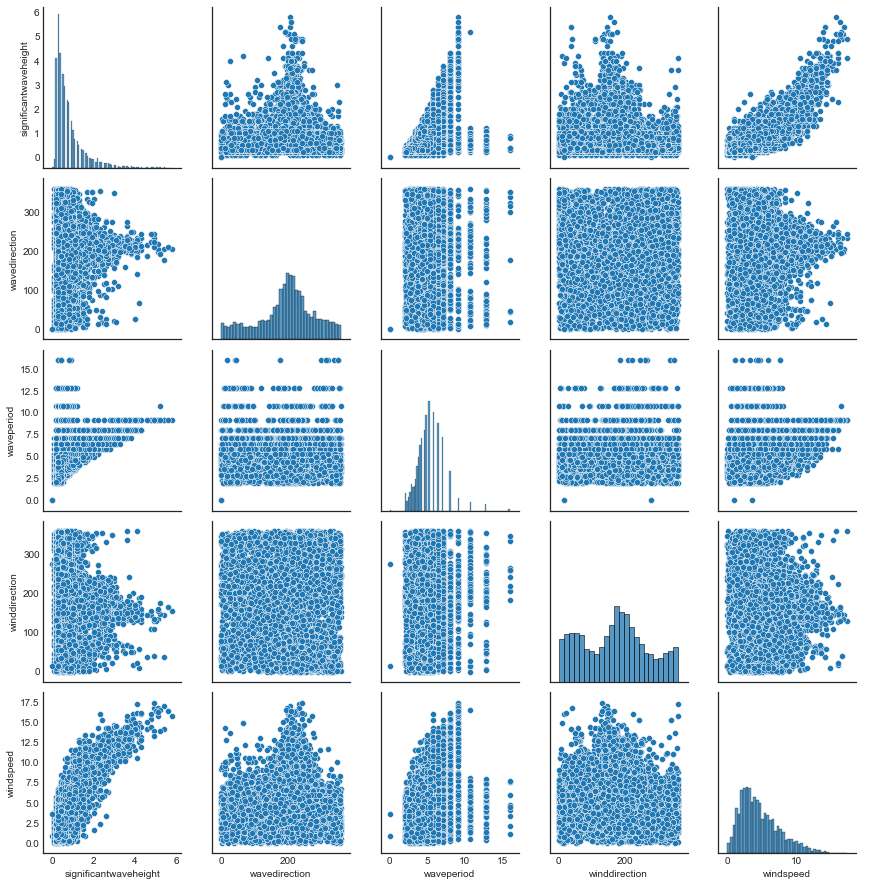

In [57]:
sns.pairplot(data.iloc[0:n1][['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection','windspeed']]);

## Simple Linear Regression

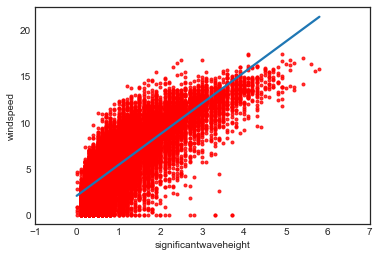

In [58]:
sns.regplot(data.significantwaveheight, data.windspeed, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-1,7)
plt.ylim(ymin=-1);

In [59]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

# Scale (center the data before scaling & scale the data to unit variance if true)
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html
X = scale(data.significantwaveheight, with_mean=True, with_std=False).reshape(-1,1)
# X = data.significantwaveheight
y = data.windspeed

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

5.015104115987156
[3.3441149]


In [60]:
data.significantwaveheight.values.reshape(-1)

array([1.7, 2.2, 2.2, ..., 0.9, 0.9, 0.9])

In [61]:
m=np.mean(data.significantwaveheight.values.reshape(-1))

In [62]:
m

0.8758684440984724

In [63]:
1.7-m

0.8241315559015275

In [64]:
scale(data.significantwaveheight, with_mean=True, with_std=False)

array([0.82413156, 1.32413156, 1.32413156, ..., 0.02413156, 0.02413156,
       0.02413156])

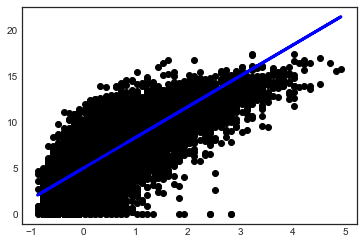

In [65]:
y_pred = regr.predict(X)
# Plot outputs
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

## Calculate the rss between y & y_pred

In [66]:
np.sum((y - y_pred)**2)

144169.61362790348

## 데이터 정규화

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Model Build

In [93]:
from keras import models
from keras import layers
from keras import losses

In [94]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(12, activation='relu', input_shape=(trainX.shape[1],)))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='logcosh', metrics=['mae'])
    return model

model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Load Data

In [95]:
data.shape

(41108, 13)

In [96]:
n = data.shape[0]

In [97]:
n1 = int(n/5*4)

In [98]:
dataX = data[['significantwaveheight', 'wavedirection', 'waveperiod', 'winddirection']]

In [99]:
dataX.shape

(41108, 4)

In [100]:
trainX_ = dataX.values[0:n1,:]

In [101]:
trainX_.shape

(32886, 4)

In [102]:
testX_ = dataX.values[n1:n,:]

In [103]:
dataY= data[['windspeed']]

In [104]:
trainY_ = dataY.values[0:n1,:]

In [105]:
testY_ = dataY.values[n1:n,:]

## Model Tranning

In [106]:
# 케라스 모델 구성(컴파일 포함)
model = build_model()
num_epochs = 100
# 모델 훈련
history = model.fit(trainX_, trainY_, epochs = num_epochs)

Epoch 1/100
32886/32886 [==============================] - 2s 58us/step - loss: 1.9454 - mean_absolute_error: 2.5365
Epoch 2/100
32886/32886 [==============================] - ETA: 0s - loss: 1.3969 - mean_absolute_error: 1.968 - 2s 48us/step - loss: 1.3929 - mean_absolute_error: 1.9639
Epoch 3/100
32886/32886 [==============================] - 2s 47us/step - loss: 1.0717 - mean_absolute_error: 1.6144
Epoch 4/100
32886/32886 [==============================] - 2s 48us/step - loss: 0.9519 - mean_absolute_error: 1.4823
Epoch 5/100
32886/32886 [==============================] - 2s 49us/step - loss: 0.9446 - mean_absolute_error: 1.4743
Epoch 6/100
32886/32886 [==============================] - 2s 51us/step - loss: 0.9311 - mean_absolute_error: 1.4572
Epoch 7/100
32886/32886 [==============================] - 2s 53us/step - loss: 0.9186 - mean_absolute_error: 1.4442
Epoch 8/100
32886/32886 [==============================] - 2s 51us/step - loss: 0.9147 - mean_absolute_error: 1.4392
Epoch 9/10

In [110]:
import os
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [115]:
MODEL_SAVE_FOLDER_PATH = './model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)
model_path = MODEL_SAVE_FOLDER_PATH + 'ocean-' + '{epoch:02d}-{val_loss:.4f}.hdf5'
cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)
cb_early_stopping = EarlyStopping(monitor='val_loss', patience=100)

In [116]:
num_epochs = 500
history = model.fit(trainX_, trainY_, validation_data=(testX_, testY_),
    epochs=num_epochs, callbacks=[cb_checkpoint, cb_early_stopping])

Train on 32886 samples, validate on 8222 samples
Epoch 1/500
32886/32886 [==============================] - 2s 59us/step - loss: 0.7391 - mean_absolute_error: 1.2333 - val_loss: 0.8718 - val_mean_absolute_error: 1.3789

Epoch 00001: val_loss improved from inf to 0.87180, saving model to ./model/ocean-01-0.8718.hdf5
Epoch 2/500
32886/32886 [==============================] - 2s 58us/step - loss: 0.7395 - mean_absolute_error: 1.2331 - val_loss: 0.8666 - val_mean_absolute_error: 1.3695

Epoch 00002: val_loss improved from 0.87180 to 0.86658, saving model to ./model/ocean-02-0.8666.hdf5
Epoch 3/500
32886/32886 [==============================] - 2s 60us/step - loss: 0.7386 - mean_absolute_error: 1.2326 - val_loss: 0.9329 - val_mean_absolute_error: 1.4457

Epoch 00003: val_loss did not improve from 0.86658
Epoch 4/500
32886/32886 [==============================] - 2s 56us/step - loss: 0.7368 - mean_absolute_error: 1.2308 - val_loss: 0.8889 - val_mean_absolute_error: 1.4063

Epoch 00004: val_l

8222/8222 [==============================] - 0s 23us/step

Accuracy: 1.3390


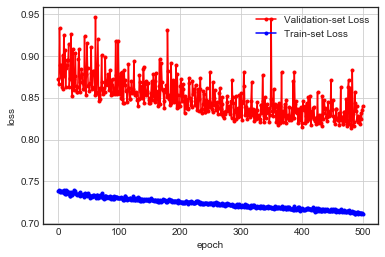

In [117]:
print('\nAccuracy: {:.4f}'.format(model.evaluate(testX_, testY_)[1]))
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Train Data Error

In [118]:
train_mse_score, train_mae_score = model.evaluate(trainX_, trainY_)

32886/32886 [==============================] - 1s 23us/step


In [119]:
trainY_targets = model.predict(trainX_)

In [120]:
n0 = 1000; n1 = 500

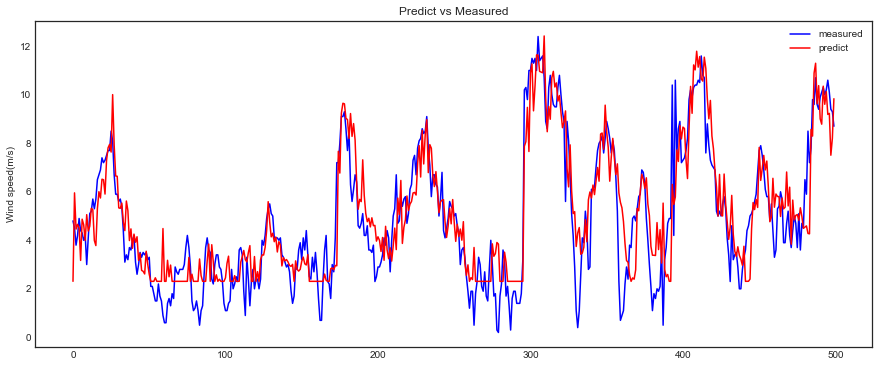

In [121]:
plt.figure(figsize=(15, 6))
plt.plot(trainY_[n0:n0+n1], 'b',label='measured')
plt.plot(trainY_targets[n0:n0+n1],'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

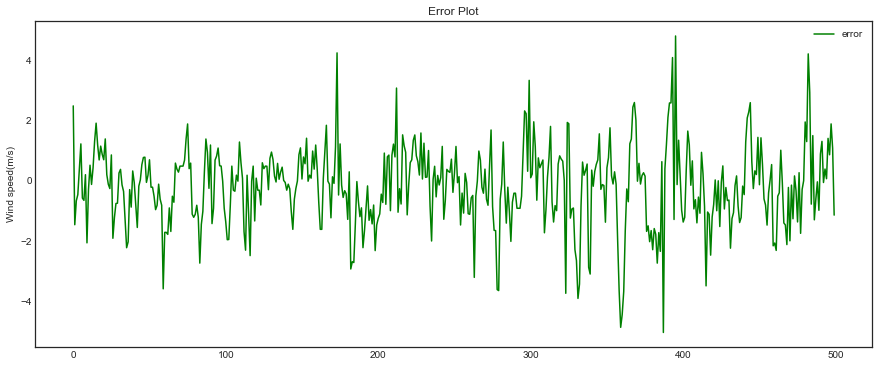

In [122]:
plt.figure(figsize=(15, 6))
plt.plot(trainY_[n0:n0+n1]-trainY_targets[n0:n0+n1], 'g',label='error')
plt.title('Error Plot')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

In [123]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(layer)
    print(weights, '\n')    

[array([[ 3.9942753e+00, -1.3840766e+01,  8.3644838e+00,  2.1524137e-01,
         7.4863799e-02, -1.3137950e+01,  2.5861225e-01, -3.9932230e+00,
        -2.4931836e+00, -5.2047830e+00,  6.6388459e+00, -1.5256896e+01],
       [ 2.3199160e-02,  7.9732835e-03,  7.9533486e-03, -3.1388137e-01,
        -1.1449931e+00,  2.6759803e-02, -3.2161579e-01, -2.6329282e-01,
        -2.1094038e-01,  1.7015404e-01,  1.2253396e-02, -9.1772087e-02],
       [ 4.1804194e+00, -6.4847022e-01, -3.2758789e+00, -6.0004532e-01,
         4.4702086e-01,  2.0153220e+00, -1.8470928e-01,  4.7991103e-01,
        -1.1260180e+00,  6.3162780e-01, -2.9860311e+00, -3.3596737e+00],
       [-9.3364514e-02, -3.8701834e-03,  5.6356387e-03, -5.6027770e-03,
        -7.2545087e-01,  7.7698585e-03, -4.2949806e-04,  3.3055738e-01,
         5.8948886e-01, -6.6923849e-02, -1.4358383e-03,  2.1646261e-01]],
      dtype=float32), array([ 4.2161865 ,  9.782857  ,  8.970984  ,  0.        , -0.99019825,
        4.025857  , -0.06156258, -4.

## Test Data

In [124]:
test_mse_score, test_mae_score = model.evaluate(testX_, testY_)

8222/8222 [==============================] - 0s 22us/step


In [125]:
testY_targets = model.predict(testX_)

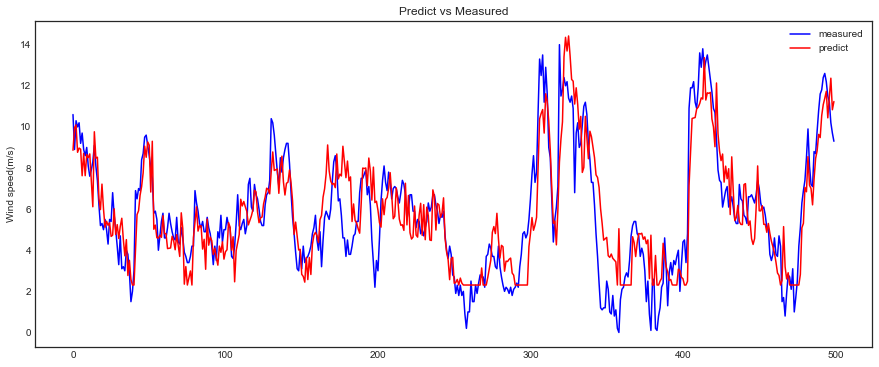

In [126]:
plt.figure(figsize=(15, 6))
plt.plot(testY_[n0:n0+n1], 'b',label='measured')
plt.plot(testY_targets[n0:n0+n1],'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

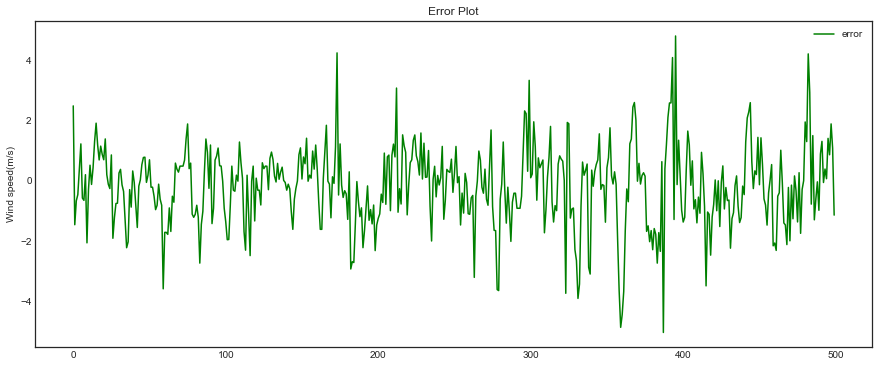

In [127]:
plt.figure(figsize=(15, 6))
plt.plot(trainY_[n0:n0+n1]-trainY_targets[n0:n0+n1], 'g',label='error')
plt.title('Error Plot')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

## 계측값과 예측값의 비교

In [ ]:
predict_targets = model.predict(test_data)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(test_targets, 'b',label='measured')
plt.plot(predict_targets,'r',label='predict')
plt.title('Predict vs Measured')
plt.ylabel('Wind speed(m/s)')
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
predict_targets = predict_targets.flatten()
test_targets = test_targets.flatten()

In [ ]:
np.savetxt('windspeed.txt',(test_targets,predict_targets))

In [ ]:
result_csv = test_csv

In [ ]:
result_csv['풍속예측(m/s)'] = predict_targets

In [ ]:
result_csv.to_csv('result/2019_result_windspeed.csv',encoding='utf-8-sig')

In [ ]:
loss_data = history.history['loss']

In [ ]:
np.savetxt('result/2019_result_windspeed_loss.txt',loss_data)